# Toy Models

In [1]:
%matplotlib inline
from __future__ import division
import numpy as np
from matplotlib import pyplot as plt
import networkx as nx
import pandas as pd
import seaborn as sns
from bokeh import mpl
from IPython.display import display
from percolation import toy_model, build_beta_lookuptable
from bokeh.plotting import figure, show
from bokeh.resources import CDN
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource
from bokeh.layouts import gridplot, row, column
import itertools as itt
sns.set_palette('colorblind')
sns.set_style("ticks")
sns.set_context("paper")
output_notebook( resources=CDN )


/home/andres/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/andres/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


Loading BokehJS ...

In [2]:
clique = 3
cog_dis = 1.5
paranoia = 0

G = nx.Graph()
G.add_edges_from([(0, 1)])
G.add_edges_from(list(itt.permutations(range(1, clique + 1), 2)))
pos=nx.shell_layout(G)
defections_dict = {}
priorC = 8
betalut = build_beta_lookuptable(12, paranoia, cog_dis, max(G.degree().values()))
alld = [0] 
for seed in range(1, 11):
    results, actions, priors = toy_model(cog_dis, paranoia, priorC, alld, G, seed, memory=12)
    defections_dict[seed] = pd.DataFrame(priors)
dfdef = pd.concat(defections_dict, names=['Seed', 'Time']).reset_index()
dfdef['Pd_12'] = betalut[dfdef[(1,2)], dfdef[(1,1)], G.degree(1)]


nodes_source = {'x': [pos[node][0] for node in G.nodes()], 'y': [pos[node][1] for node in G.nodes()],
                'text': [str(node) for node in G.nodes()], 'color': ['red']}
nodes_source['color'].extend(['blue' for i in range(len(G.nodes())-1)])
nodes_source = ColumnDataSource(nodes_source)
edges_source = ColumnDataSource({'x': [[pos[node][0] for node in edge] for edge in G.edges()],
                                 'y':[[pos[node][1] for node in edge] for edge in G.edges()]})



net = figure(x_range = (-1.1,1.1), y_range = (-1.1,1.1), height= 320, width= 320)
net.multi_line(xs='x', ys='y', source=edges_source)
net.circle(x='x', y='y', fill_color='color',source=nodes_source, radius=.05)
net.text(x='x', y='y', text='text', source=nodes_source)


plt.figure(figsize=[4, 4])
sns.tsplot(dfdef, time='Time', unit='Seed', value=(1,2))
p = mpl.to_bokeh()

plt.figure(figsize=[4, 4])
sns.tsplot(dfdef, time='Time', unit='Seed', value=(1,1))
p2 = mpl.to_bokeh()
p.x_range = p2.x_range

plt.figure(figsize=[4, 4])
sns.tsplot(dfdef, time='Time', unit='Seed', value='Pd_12')
p3 = mpl.to_bokeh()
p3.x_range = p2.x_range

show(gridplot([[net, p], [p2, p3]]))

/home/andres/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:17: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future
/home/andres/anaconda2/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [3]:
grid = []
for clique in [3, 5, 7, 10]:
    cog_dis = 1.5
    paranoia = 0

    G = nx.Graph()
    G.add_edges_from([(0, 1)])
    G.add_edges_from(list(itt.permutations(range(1, clique + 1), 2)))
    pos=nx.shell_layout(G)
    defections_dict = {}
    priorC = 8
    betalut = build_beta_lookuptable(12, paranoia, cog_dis, max(G.degree().values()))
    alld = [0] 
    for seed in range(1, 11):
        results, actions, priors = toy_model(cog_dis, paranoia, priorC, alld, G, seed, memory=12)
        defections_dict[seed] = pd.DataFrame(priors)
    dfdef = pd.concat(defections_dict, names=['Seed', 'Time']).reset_index()
    dfdef['Pd_12'] = betalut[dfdef[(1,2)], dfdef[(1,1)], G.degree(1)]


    nodes_source = {'x': [pos[node][0] for node in G.nodes()], 'y': [pos[node][1] for node in G.nodes()],
                    'text': [str(node) for node in G.nodes()], 'color': ['red']}
    nodes_source['color'].extend(['blue' for i in range(len(G.nodes())-1)])
    nodes_source = ColumnDataSource(nodes_source)
    edges_source = ColumnDataSource({'x': [[pos[node][0] for node in edge] for edge in G.edges()],
                                     'y':[[pos[node][1] for node in edge] for edge in G.edges()]})

    net = figure(x_range = (-1.1,1.1), y_range = (-1.1,1.1), height= 320, width= 320)
    net.multi_line(xs='x', ys='y', source=edges_source)
    net.circle(x='x', y='y', fill_color='color',source=nodes_source, radius=.05)
    net.text(x='x', y='y', text='text', source=nodes_source)

    plt.figure(figsize=[4, 2])
    sns.tsplot(dfdef, time='Time', unit='Seed', value=(1,2))
    p = mpl.to_bokeh()

    plt.figure(figsize=[4, 2])
    sns.tsplot(dfdef, time='Time', unit='Seed', value=(1,1))
    p2 = mpl.to_bokeh()
    p.x_range = p2.x_range

    plt.figure(figsize=[4, 4])
    sns.tsplot(dfdef, time='Time', unit='Seed', value='Pd_12')
    p3 = mpl.to_bokeh()
    p3.x_range = p2.x_range
    grid.append(row(net, p3, column(p, p2)))

grid[1].children[1].y_range = grid[0].children[1].y_range
grid[2].children[1].y_range = grid[0].children[1].y_range
grid[1].children[2].children[0].y_range = grid[0].children[2].children[0].y_range
grid[1].children[2].children[1].y_range = grid[0].children[2].children[1].y_range

grid[1].children[2].children[0].x_range = grid[0].children[1].x_range
grid[1].children[2].children[1].x_range = grid[0].children[1].x_range
grid[1].children[1].x_range = grid[0].children[1].x_range

grid[2].children[2].children[0].y_range = grid[0].children[2].children[0].y_range
grid[2].children[2].children[1].y_range = grid[0].children[2].children[1].y_range
grid[2].children[2].children[0].x_range = grid[0].children[1].x_range
grid[2].children[2].children[1].x_range = grid[0].children[1].x_range
grid[2].children[1].x_range = grid[0].children[1].x_range

show(column(*grid))                

/home/andres/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:18: VisibleDeprecationWarning: non integer (and non boolean) array-likes will not be accepted as indices in the future


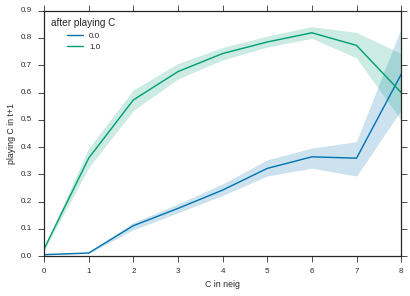

In [11]:
cog_dis = 100.5
paranoia = 0

G = nx.grid_2d_graph(13, 13, periodic=True)
for (x1, y1), (x2, y2) in itt.combinations(G.nodes(), 2):
    x11 = x1
    x22 = x2
    y11 = y1
    y22 = y2
    if x1*x2==0 and x2+x1==12:
        x22 = -1
        x11 = 0
    if y1*y2==0 and y1+y2==12:
        y22 = -1
        y11 = 0
    d2 = (x11-x22)**2 + (y11-y22)**2
    if d2==2:
        G.add_edge((x1,y1), (x2,y2))
G = nx.convert_node_labels_to_integers(G)
#priorC = 10
priorC = np.random.randint(1, 6, size=G.number_of_nodes())
betalut = build_beta_lookuptable(6, paranoia, cog_dis, max(G.degree().values()))
alld = np.random.randint(0, G.number_of_nodes(), 5) 
seed = 1
results, actions, priors = toy_model(cog_dis, paranoia, priorC, alld, G, seed, memory=6)

pepe = []
i=0
for action, node in itt.product(actions, G.nodes()):
    for neig in G.neighbors(node):
        pepe1 = not action[(node, neig)]
        pepe2 = sum([not action[(n, node)] for n in G.neighbors(node)])
        pepe.append({'after playing C': pepe1, 'C in neig': pepe2, 'unit': i})
        i+=1
df = pd.DataFrame(pepe)
df['playing C in t+1'] = df.loc[1:, 'after playing C'].reset_index()['after playing C']
df = df.dropna()
df = df.astype(float)

sns.tsplot(df, time='C in neig', condition='after playing C', unit='unit', value='playing C in t+1', n_boot=100,
           estimator=np.nanmean)

In [39]:
G = nx.grid_2d_graph(13, 13, periodic=True)
for (x1, y1), (x2, y2) in itt.combinations(G.nodes(), 2):
    d2 = (x1-x2)**2 + (y1-y2)**2
    if d2==2:
        G.add_edge((x1,y1), (x2,y2))

(7, 3, 8, 2)
